In [4]:
pip install num2words

     |████████████████████████████████| 102kB 2.2MB/s 


In [18]:
pip install emoji

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42175 sha256=e74b56e580e41e84e2f604979764dedcef9e02713fc6563e1de6821aaf779484
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [0]:
#Importing necessary libraries

from IPython import display
import math
import string
from pprint import pprint
from num2words import num2words
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [3]:
pip install praw

     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 204kB 61.8MB/s 


In [0]:
#client id- StmWjOzTODd8Og
#user agent- r/webscraper
#secret- 3-HWmn6SD7a32SEoOLXyVSUv5jQ

import praw
reddit = praw.Reddit(client_id='StmWjOzTODd8Og', client_secret='3-HWmn6SD7a32SEoOLXyVSUv5jQ', user_agent='r/webscraper')

In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [22]:
#Storing the titles of extracted posts into a set to avoid repetition

posts = set()

for post in reddit.subreddit('gameofthrones').hot(limit=500):
  posts.add(post.title)

print(posts)
print(len(posts))

{"[NO SPOILERS] Here's my Dad's Thrones set up for the Armageddon Expo here in NZ. His first proper build.", '[Spoilers] The Hound Soundboard', '[Spoilers] who do you think should of won???', '[SPOILERS]. Interesting take on Jamie Lannister | least someone seems somewhat positive on the Ending', '[NO SPOILERS] Found this gem in Canby OR... not creepy at all', '[NO SPOILERS] Just recieved my "Red Viper\'s Spear" replica. Longclaw for scale.', "[No Spoilers] I'M NOT YOUR HAND ANYMORE 😂", "[No Spoilers] I'm a dumbass, I got attached", '[SPOILERS] Better actress - Cersei or Catelyn Stark?', '[No Spoilers] Onboard the cruise ship Jewel of the Seas for my honeymoon', "[NO SPOILERS] Halloween is coming. The Night King pumpkin for my work's pumpkin carving competition.", '[NO SPOILERS]Epoxy Dragons', '[No Spoilers] Another New Game of Thrones Prequel In The Works', "[No Spoilers] Here's my Season 6 Dany with a better full-body this time.", '[SPOILERS] Amateur video editor, made this for Sansa 

In [11]:
#Brute sentiment analysis without preprocessing and cleaning of extracted data

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for post in posts:
  score = sia.polarity_scores(post)
  score['post'] = post
  results.append(score)
  
pprint(results[:5], width=100)

[{'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'post': "[NO SPOILERS] Here's my Dad's Thrones set up for the Armageddon Expo here in NZ. His "
          'first proper build.'},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'post': '[Spoilers] The Hound Soundboard'},
 {'compound': 0.6416,
  'neg': 0.0,
  'neu': 0.623,
  'pos': 0.377,
  'post': '[Spoilers] who do you think should of won???'},
 {'compound': 0.719,
  'neg': 0.0,
  'neu': 0.666,
  'pos': 0.334,
  'post': '[SPOILERS]. Interesting take on Jamie Lannister | least someone seems somewhat positive '
          'on the Ending'},
 {'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'post': '[NO SPOILERS] Found this gem in Canby OR... not creepy at all'}]


In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#Stopword removal, punctuation elimination and tokenization of extracted data

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

remove = set(stopwords.words('english'))
filtered = []

for post in posts:
  #Converting numbers to words, translation of emojis and removing punctuations to give bag of words
  post = [num2words(x) if x.isnumeric() else emoji.demojize(x, delimiters=('!', '!')) for x in post.translate(str.maketrans('', '', string.punctuation)).lower().split()]
  
  #Removing stopwords and words irrelevant to sentiment
  temp = [x for x in post if x not in remove]
  filtered.append(" ".join(temp).replace('spoilers', '').strip())

In [24]:
#Results of sentiment analysis after preprocessing

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for post in filtered:
  score = sia.polarity_scores(post)
  score['post'] = post
  results.append(score)
  
pprint(results[:5], width=100)
data = pd.DataFrame.from_records(results)
data.head()

[{'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'post': 'heres dads thrones set armageddon expo nz first proper build'},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'post': 'hound soundboard'},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'post': 'think'},
 {'compound': 0.719,
  'neg': 0.0,
  'neu': 0.571,
  'pos': 0.429,
  'post': 'interesting take jamie lannister least someone seems somewhat positive ending'},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'post': 'found gem canby creepy'}]


,neg,neu,pos,compound,post
0,0.0,1.000,0.000,0.000,heres dads thrones set armageddon expo nz firs...
1,0.0,1.000,0.000,0.000,hound soundboard
2,0.0,1.000,0.000,0.000,think
3,0.0,0.571,0.429,0.719,interesting take jamie lannister least someone...
4,0.0,1.000,0.000,0.000,found gem canby creepy


In [25]:
#Labelling the sentiments depending on a compound threshold of 0.2(can be adjusted)
data['label'] = 0
data.loc[data['compound'] > 0.2, 'label'] = 1
data.loc[data['compound'] < -0.2, 'label'] = -1
data[:10]

,neg,neu,pos,compound,post,label
0,0.000,1.000,0.000,0.0000,heres dads thrones set armageddon expo nz firs...,0
1,0.000,1.000,0.000,0.0000,hound soundboard,0
2,0.000,1.000,0.000,0.0000,think,0
3,0.000,0.571,0.429,0.7190,interesting take jamie lannister least someone...,1
4,0.000,1.000,0.000,0.0000,found gem canby creepy,0
5,0.000,1.000,0.000,0.0000,recieved red vipers spear replica longclaw scale,0
6,0.000,0.442,0.558,0.5837,im hand anymore !face_with_tears_of_joy!,1
7,0.545,0.455,0.000,-0.5574,im dumbass got attached,-1
8,0.000,0.580,0.420,0.4404,better actress cersei catelyn stark,1
9,0.000,0.667,0.333,0.3612,onboard cruise ship jewel seas honeymoon,1


In [29]:
#Saving the post label data to CSV
label_data = data[['post', 'label']]
label_data.to_csv('reddit_posts_labels.csv', mode='a', encoding='utf-8', index=False)

#Sample posts from positive and negative label categories
print('Positive posts-')
pprint(list(data[data['label'] == 1].post)[:5], width=150)
print('Negative posts-')
pprint(list(data[data['label'] == -1].post)[:5], width=150)

Positive posts-
['interesting take jamie lannister least someone seems somewhat positive ending',
 'im hand anymore !face_with_tears_of_joy!',
 'better actress cersei catelyn stark',
 'onboard cruise ship jewel seas honeymoon',
 'heres season six dany better fullbody time']
Negative posts-
['im dumbass got attached',
 'alternative ending daenerys walks sits iron throne seems lost camera pans takes face arya que music dun dun dadadun dun clips got closes dun dun '
 'da dun goosebumps',
 'ever meet rory mccannsandor clegane don’t want autograph picture want call fucking cunt',
 'david benioff db weiss recent discussion got revealing confusing',
 'cant wait see play house dragon torrhen stark bending knee aegon targaryen']


In [30]:
#Calculating number and percentage of posts belonging to any of the sentiments
print(data.label.value_counts())
print(data.label.value_counts(normalize=True) * 100)

 0    273
 1    153
-1     74
Name: label, dtype: int64
 0    54.6
 1    30.6
-1    14.8
Name: label, dtype: float64


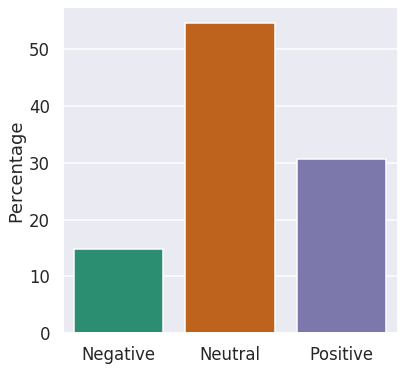

In [32]:
#Plotting a bar graph of the posts according to their sentiments

fig, ax = plt.subplots(figsize=(6, 6))
counts = data.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')
plt.show()